In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tv-and-movie-metadata-with-genres-and-ratings-imbd/IMBD.csv


In [2]:


# Load the data into a pandas dataframe

df = pd.read_csv('/kaggle/input/tv-and-movie-metadata-with-genres-and-ratings-imbd/IMBD.csv')

# Display the first few rows of the dataframe
df.head()


,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie']
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde']
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN


In [3]:
# Get the shape of the dataset
shape = df.shape

# Check for missing values
missing_values = df.isnull().sum()

shape, missing_values


((129891, 9),
 movie               0
 genre               0
 runtime         20886
 certificate    106041
 rating          15510
 stars            5215
 description         0
 votes           15498
 director        41280
 dtype: int64)

In [4]:
# Display unique values in the 'runtime' column
df['runtime'].unique()


array(['60 min', '163 min', '131 min', '47 min', nan, '122 min', '52 min',
       '30 min', '144 min', '127 min', '57 min', '154 min', '50 min',
       '95 min', '44 min', '150 min', '140 min', '99 min', '148 min',
       '152 min', '123 min', '106 min', '102 min', '137 min', '169 min',
       '192 min', '24 min', '134 min', '43 min', '155 min', '116 min',
       '147 min', '110 min', '105 min', '92 min', '176 min', '130 min',
       '113 min', '87 min', '135 min', '91 min', '141 min', '49 min',
       '25 min', '45 min', '101 min', '40 min', '117 min', '89 min',
       '164 min', '93 min', '158 min', '139 min', '23 min', '132 min',
       '126 min', '26 min', '100 min', '115 min', '156 min', '55 min',
       '142 min', '109 min', '181 min', '124 min', '119 min', '20 min',
       '170 min', '178 min', '125 min', '70 min', '121 min', '114 min',
       '107 min', '143 min', '42 min', '46 min', '120 min', '242 min',
       '97 min', '118 min', '162 min', '136 min', '53 min', '41 min',
   

In [5]:
# Display unique values in the 'votes' column
df['votes'].unique()


array(['5,39,085', '1,06,759', '41,808', ..., '10,076', '3,606', '3,367'],
      dtype=object)

In [6]:
# Find non-numeric values in the 'votes' column, ignoring NaNs
non_numeric_votes = df['votes'].dropna()[~df['votes'].dropna().str.replace(',', '').str.isdigit()]

non_numeric_votes.unique()


array(['$292.58M', '$58.46M', '$534.86M', ..., '$2.58M', '$31.80M',
       '$18.29M'], dtype=object)

In [7]:
# Calculate the number of non-numeric values and the total number of values in the 'votes' column
num_non_numeric_votes = len(non_numeric_votes)
total_votes = len(df['votes'])

num_non_numeric_votes, total_votes


(13145, 129891)

In [8]:
# Replace the non-numeric values in the 'votes' column with NaNs, ignoring NaNs
df.loc[df['votes'].dropna()[~df['votes'].dropna().str.replace(',', '').str.isdigit()].index, 'votes'] = np.nan

# Convert the remaining numeric values in the 'votes' column to integers
df['votes'] = df['votes'].str.replace(',', '').astype(float)

df.head()


,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...",539085.0,NaN
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,106759.0,['Christopher McQuarrie']
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,41808.0,['Alejandro Monteverde']
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,40536.0,NaN
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,3203.0,NaN


In [9]:
# Display information about the dataframe
df.info()

# Display the number of missing values in each column
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Display basic statistics about the numerical columns
df.describe(include=[np.number])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129891 entries, 0 to 129890
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movie        129891 non-null  object 
 1   genre        129891 non-null  object 
 2   runtime      109005 non-null  object 
 3   certificate  23850 non-null   object 
 4   rating       114381 non-null  float64
 5   stars        124676 non-null  object 
 6   description  129891 non-null  object 
 7   votes        101248 non-null  float64
 8   director     88611 non-null   object 
dtypes: float64(2), object(7)
memory usage: 8.9+ MB

Number of missing values in each column:
movie               0
genre               0
runtime         20886
certificate    106041
rating          15510
stars            5215
description         0
votes           28643
director        41280
dtype: int64


,rating,votes
count,114381.000000,1.012480e+05
mean,6.521429,4.368274e+03
std,1.334240,2.907821e+04
min,1.000000,5.000000e+00
25%,5.800000,7.500000e+01
50%,6.700000,3.450000e+02
75%,7.400000,1.611000e+03
max,10.000000,2.186980e+06


In [10]:
# Split the 'genre' column into separate genres
genre_split = df['genre'].str.split(',').explode()

# Count the number of TV shows and movies in each genre
genre_counts = genre_split.value_counts()

genre_counts


Drama                 18121
 Drama                17204
Action                15727
Comedy                15717
 Drama                12969
                      ...  
 News                    52
Film-Noir                33
 Documentary             14
 Talk-Show                5
 Adult                    2
Name: genre, Length: 102, dtype: int64

In [11]:
# Remove leading spaces from the genres
genre_split = genre_split.str.strip()

# Count the number of TV shows and movies in each genre
genre_counts = genre_split.value_counts()

genre_counts


Drama          49275
Comedy         29642
Action         20692
Documentary    17306
Adventure      16210
Short          15397
Crime          13291
Romance        13121
Animation      12281
Horror         10902
Biography      10511
Music          10357
History         9929
Thriller        9529
Family          9461
Sport           8316
Western         8167
Musical         7988
Fantasy         7757
War             6851
Mystery         6204
Sci-Fi          6202
Film-Noir        911
Reality-TV       776
Game-Show        371
Talk-Show        354
News             337
Adult              2
Name: genre, dtype: int64

In [12]:
# Calculate the average rating for each genre
average_rating_by_genre = df.assign(genre=df['genre'].str.split(',')).explode('genre')['rating'].groupby(df['genre']).mean()

# Calculate the total number of votes for each genre
total_votes_by_genre = df.assign(genre=df['genre'].str.split(',')).explode('genre')['votes'].groupby(df['genre']).sum()

average_rating_by_genre, total_votes_by_genre


(genre
 Action                                      5.314451
 Action, Adventure                           5.603448
 Action, Adventure, Animation                6.950000
 Action, Adventure, Biography                6.744304
 Action, Adventure, Comedy                   5.953671
                                               ...   
 Western, Romance                            6.300000
 Western, Short                              5.214286
 Western, Short, Music                       6.100000
 Western, Thriller                           5.800000
 Western, Thriller, Action                   5.400000
 Name: rating, Length: 2214, dtype: float64,
 genre
 Action                                        172543.0
 Action, Adventure                             484716.0
 Action, Adventure, Animation                    3552.0
 Action, Adventure, Biography                 3284004.0
 Action, Adventure, Comedy                   20420865.0
                                                ...    
 Western, R

In [13]:
# Calculate the average rating for each genre
average_rating_by_genre = df.assign(genre=df['genre'].str.split(', ')).explode('genre')['rating'].groupby(df['genre']).mean()

# Calculate the total number of votes for each genre
total_votes_by_genre = df.assign(genre=df['genre'].str.split(', ')).explode('genre')['votes'].groupby(df['genre']).sum()

average_rating_by_genre, total_votes_by_genre


(genre
 Action                                      5.314451
 Action, Adventure                           5.603448
 Action, Adventure, Animation                6.950000
 Action, Adventure, Biography                6.744304
 Action, Adventure, Comedy                   5.953671
                                               ...   
 Western, Romance                            6.300000
 Western, Short                              5.214286
 Western, Short, Music                       6.100000
 Western, Thriller                           5.800000
 Western, Thriller, Action                   5.400000
 Name: rating, Length: 2214, dtype: float64,
 genre
 Action                                        172543.0
 Action, Adventure                             484716.0
 Action, Adventure, Animation                    3552.0
 Action, Adventure, Biography                 3284004.0
 Action, Adventure, Comedy                   20420865.0
                                                ...    
 Western, R

In [14]:
# Calculate the average rating and total votes for each individual genre
df_genre_exploded = df.assign(genre=df['genre'].str.split(', ')).explode('genre')
average_rating_by_genre = df_genre_exploded.groupby('genre')['rating'].mean()
total_votes_by_genre = df_genre_exploded.groupby('genre')['votes'].sum()

average_rating_by_genre, total_votes_by_genre


(genre
 Action                     6.273247
 Action                     6.479733
 Adult                      4.500000
 Adventure                  6.305009
 Adventure                  6.862565
 Animation                  6.815195
 Animation                  6.774506
 Biography                  6.922474
 Biography                  7.136610
 Comedy                     6.303534
 Comedy                     6.535267
 Crime                      6.506111
 Crime                      6.540531
 Documentary                7.309284
 Documentary                7.198345
 Drama                      6.506627
 Drama                      6.724699
 Family                     6.415855
 Family                     6.445325
 Fantasy                    6.183009
 Fantasy                    6.461535
 Film-Noir                  6.582353
 Film-Noir                  6.454261
 Game-Show                  6.322831
 Game-Show                  7.006957
 History                    7.006062
 History                    7.0

In [15]:
# Remove leading spaces from the genres
df_genre_exploded['genre'] = df_genre_exploded['genre'].str.strip()

# Calculate the average rating and total votes for each individual genre
average_rating_by_genre = df_genre_exploded.groupby('genre')['rating'].mean()
total_votes_by_genre = df_genre_exploded.groupby('genre')['votes'].sum()

average_rating_by_genre, total_votes_by_genre


(genre
 Action         6.281501
 Adult          4.500000
 Adventure      6.412944
 Animation      6.813222
 Biography      6.968937
 Comedy         6.362556
 Crime          6.513369
 Documentary    7.276078
 Drama          6.566687
 Family         6.433987
 Fantasy        6.352960
 Film-Noir      6.483040
 Game-Show      6.558383
 History        7.049478
 Horror         5.385295
 Music          6.866357
 Musical        6.454928
 Mystery        6.338088
 News           7.028425
 Reality-TV     6.582571
 Romance        6.403032
 Sci-Fi         5.733027
 Short          6.960230
 Sport          6.848459
 Talk-Show      6.966786
 Thriller       5.845827
 War            6.661781
 Western        5.999739
 Name: rating, dtype: float64,
 genre
 Action         128383755.0
 Adult                 36.0
 Adventure       90337774.0
 Animation       44888462.0
 Biography       21462978.0
 Comedy         120766762.0
 Crime          107143040.0
 Documentary     13527026.0
 Drama          271531458.0
 Fa

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


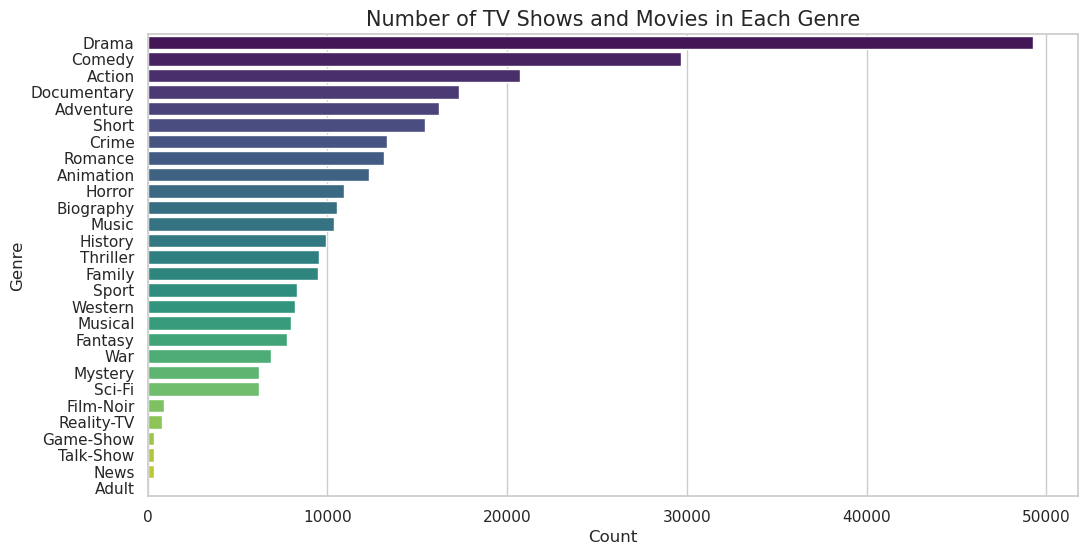

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the number of TV shows and movies in each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Number of TV Shows and Movies in Each Genre', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


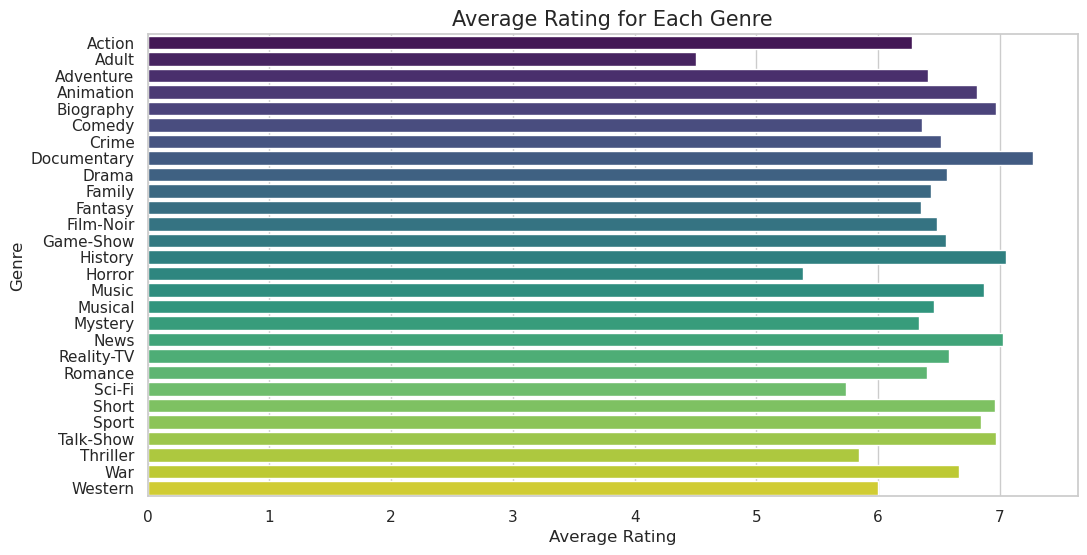

In [17]:
# Create a bar plot for the average rating of each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=average_rating_by_genre.values, y=average_rating_by_genre.index, palette="viridis")
plt.title('Average Rating for Each Genre', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


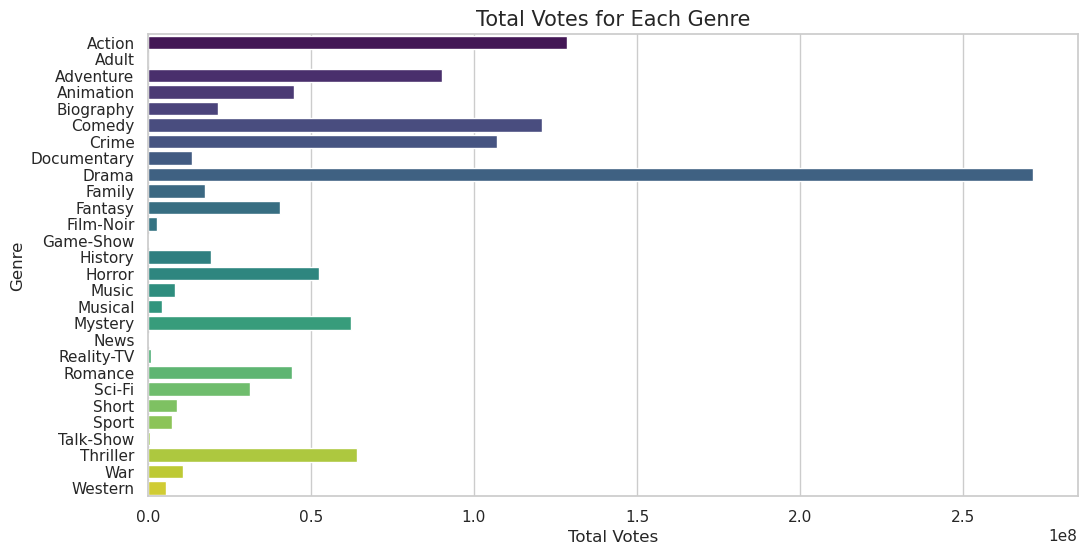

In [18]:
# Create a bar plot for the total votes of each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=total_votes_by_genre.values, y=total_votes_by_genre.index, palette="viridis")
plt.title('Total Votes for Each Genre', fontsize=15)
plt.xlabel('Total Votes', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


In [19]:
# Count the number of TV shows and movies directed by each director
director_counts = df['director'].value_counts()

# Calculate the average rating and total votes for each director
average_rating_by_director = df.groupby('director')['rating'].mean()
total_votes_by_director = df.groupby('director')['votes'].sum()

director_counts, average_rating_by_director, total_votes_by_director


([]                      726
 ['Kevin Dunn']          306
 ['Sam Newfield']        148
 ['Lesley Selander']     121
 ['Joseph Kane']         102
                        ... 
 ['Stephanie McBain']      1
 ['Atma Ram']              1
 ['Helle Karis']           1
 ['Arun Vaiga']            1
 ['Diego Al Romero']       1
 Name: director, Length: 39707, dtype: int64,
 director
 ["'Weird Al' Yankovic"]      7.85000
 ["Adetokumboh M'Cormack"]    7.80000
 ["Adriana O'Neil"]               NaN
 ["Ahmad 'Akiin' Thomas"]     7.00000
 ["Ahmad Reza Mo'tamedi"]     5.80000
                               ...   
 ['Øyvind Vennerød']          4.70000
 ['Ümit Degirmenci']          2.80000
 ['Ümit Efekan']              6.00000
 ['Ümit Ünal']                5.10000
 []                           7.27296
 Name: rating, Length: 39707, dtype: float64,
 director
 ["'Weird Al' Yankovic"]        1422.0
 ["Adetokumboh M'Cormack"]        23.0
 ["Adriana O'Neil"]                0.0
 ["Ahmad 'Akiin' Thomas"]         

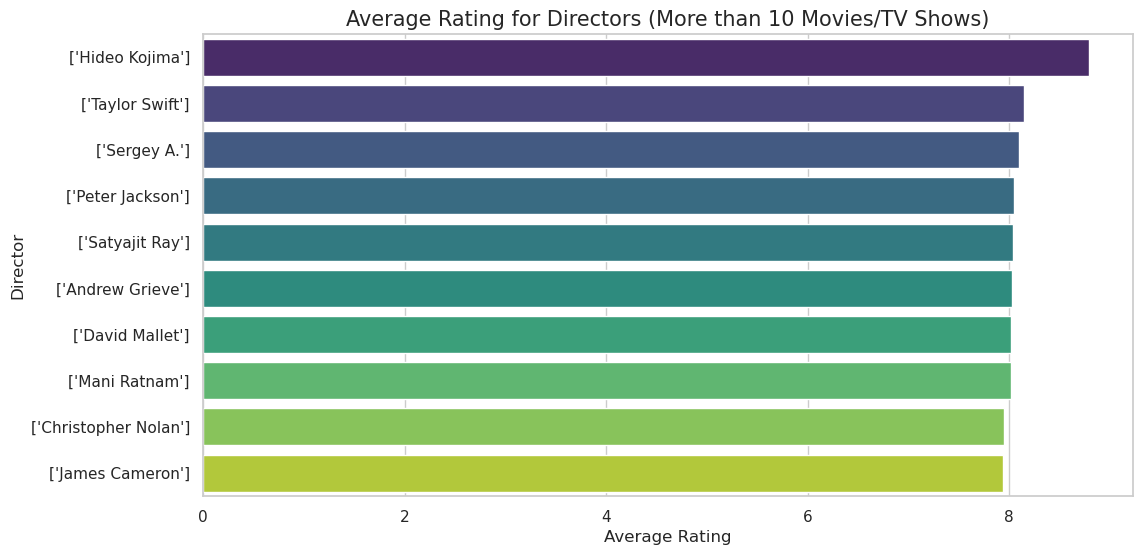

In [20]:
# Count the number of TV shows and movies directed by each director
director_counts = df['director'].value_counts()

# Filter to include only directors who have directed more than 10 TV shows or movies
directors_with_more_than_10 = director_counts[director_counts > 10].index

# Filter average rating and total votes by these directors
filtered_average_rating_by_director = average_rating_by_director[average_rating_by_director.index.isin(directors_with_more_than_10)]
filtered_total_votes_by_director = total_votes_by_director[total_votes_by_director.index.isin(directors_with_more_than_10)]

# Create a bar plot for the average rating of each director
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_average_rating_by_director.sort_values(ascending=False)[:10].values, 
            y=filtered_average_rating_by_director.sort_values(ascending=False)[:10].index, 
            palette="viridis")
plt.title('Average Rating for Directors (More than 10 Movies/TV Shows)', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()


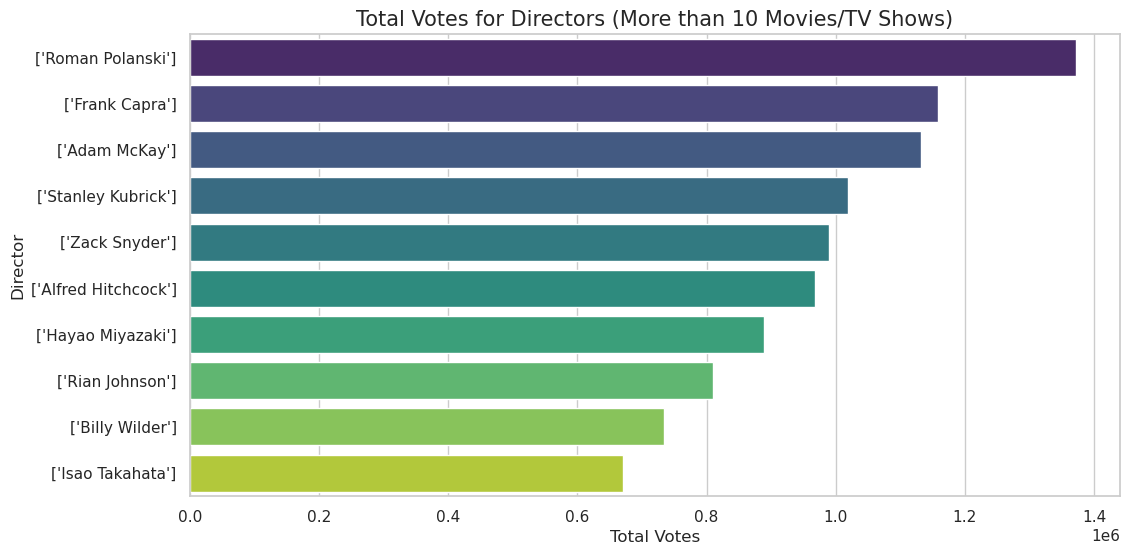

In [21]:
# Create a bar plot for the total votes of each director
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_total_votes_by_director.sort_values(ascending=False)[:10].values, 
            y=filtered_total_votes_by_director.sort_values(ascending=False)[:10].index, 
            palette="viridis")
plt.title('Total Votes for Directors (More than 10 Movies/TV Shows)', fontsize=15)
plt.xlabel('Total Votes', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()
